# Reddit Scraping Script

In [ ]:
# Author : Saksham Arora

In [1]:
import numpy as np 
import pandas as pd
import praw 
import matplotlib.pyplot as plt 
import networkx as nx 
import time

In [1]:
# add your own
client_id=''
client_secret=''

## Create Network 

In [55]:
network_df = quant_subreddit[['author', 'subreddit']]
g = nx.from_pandas_edgelist(network_df, source='author', target='subreddit')

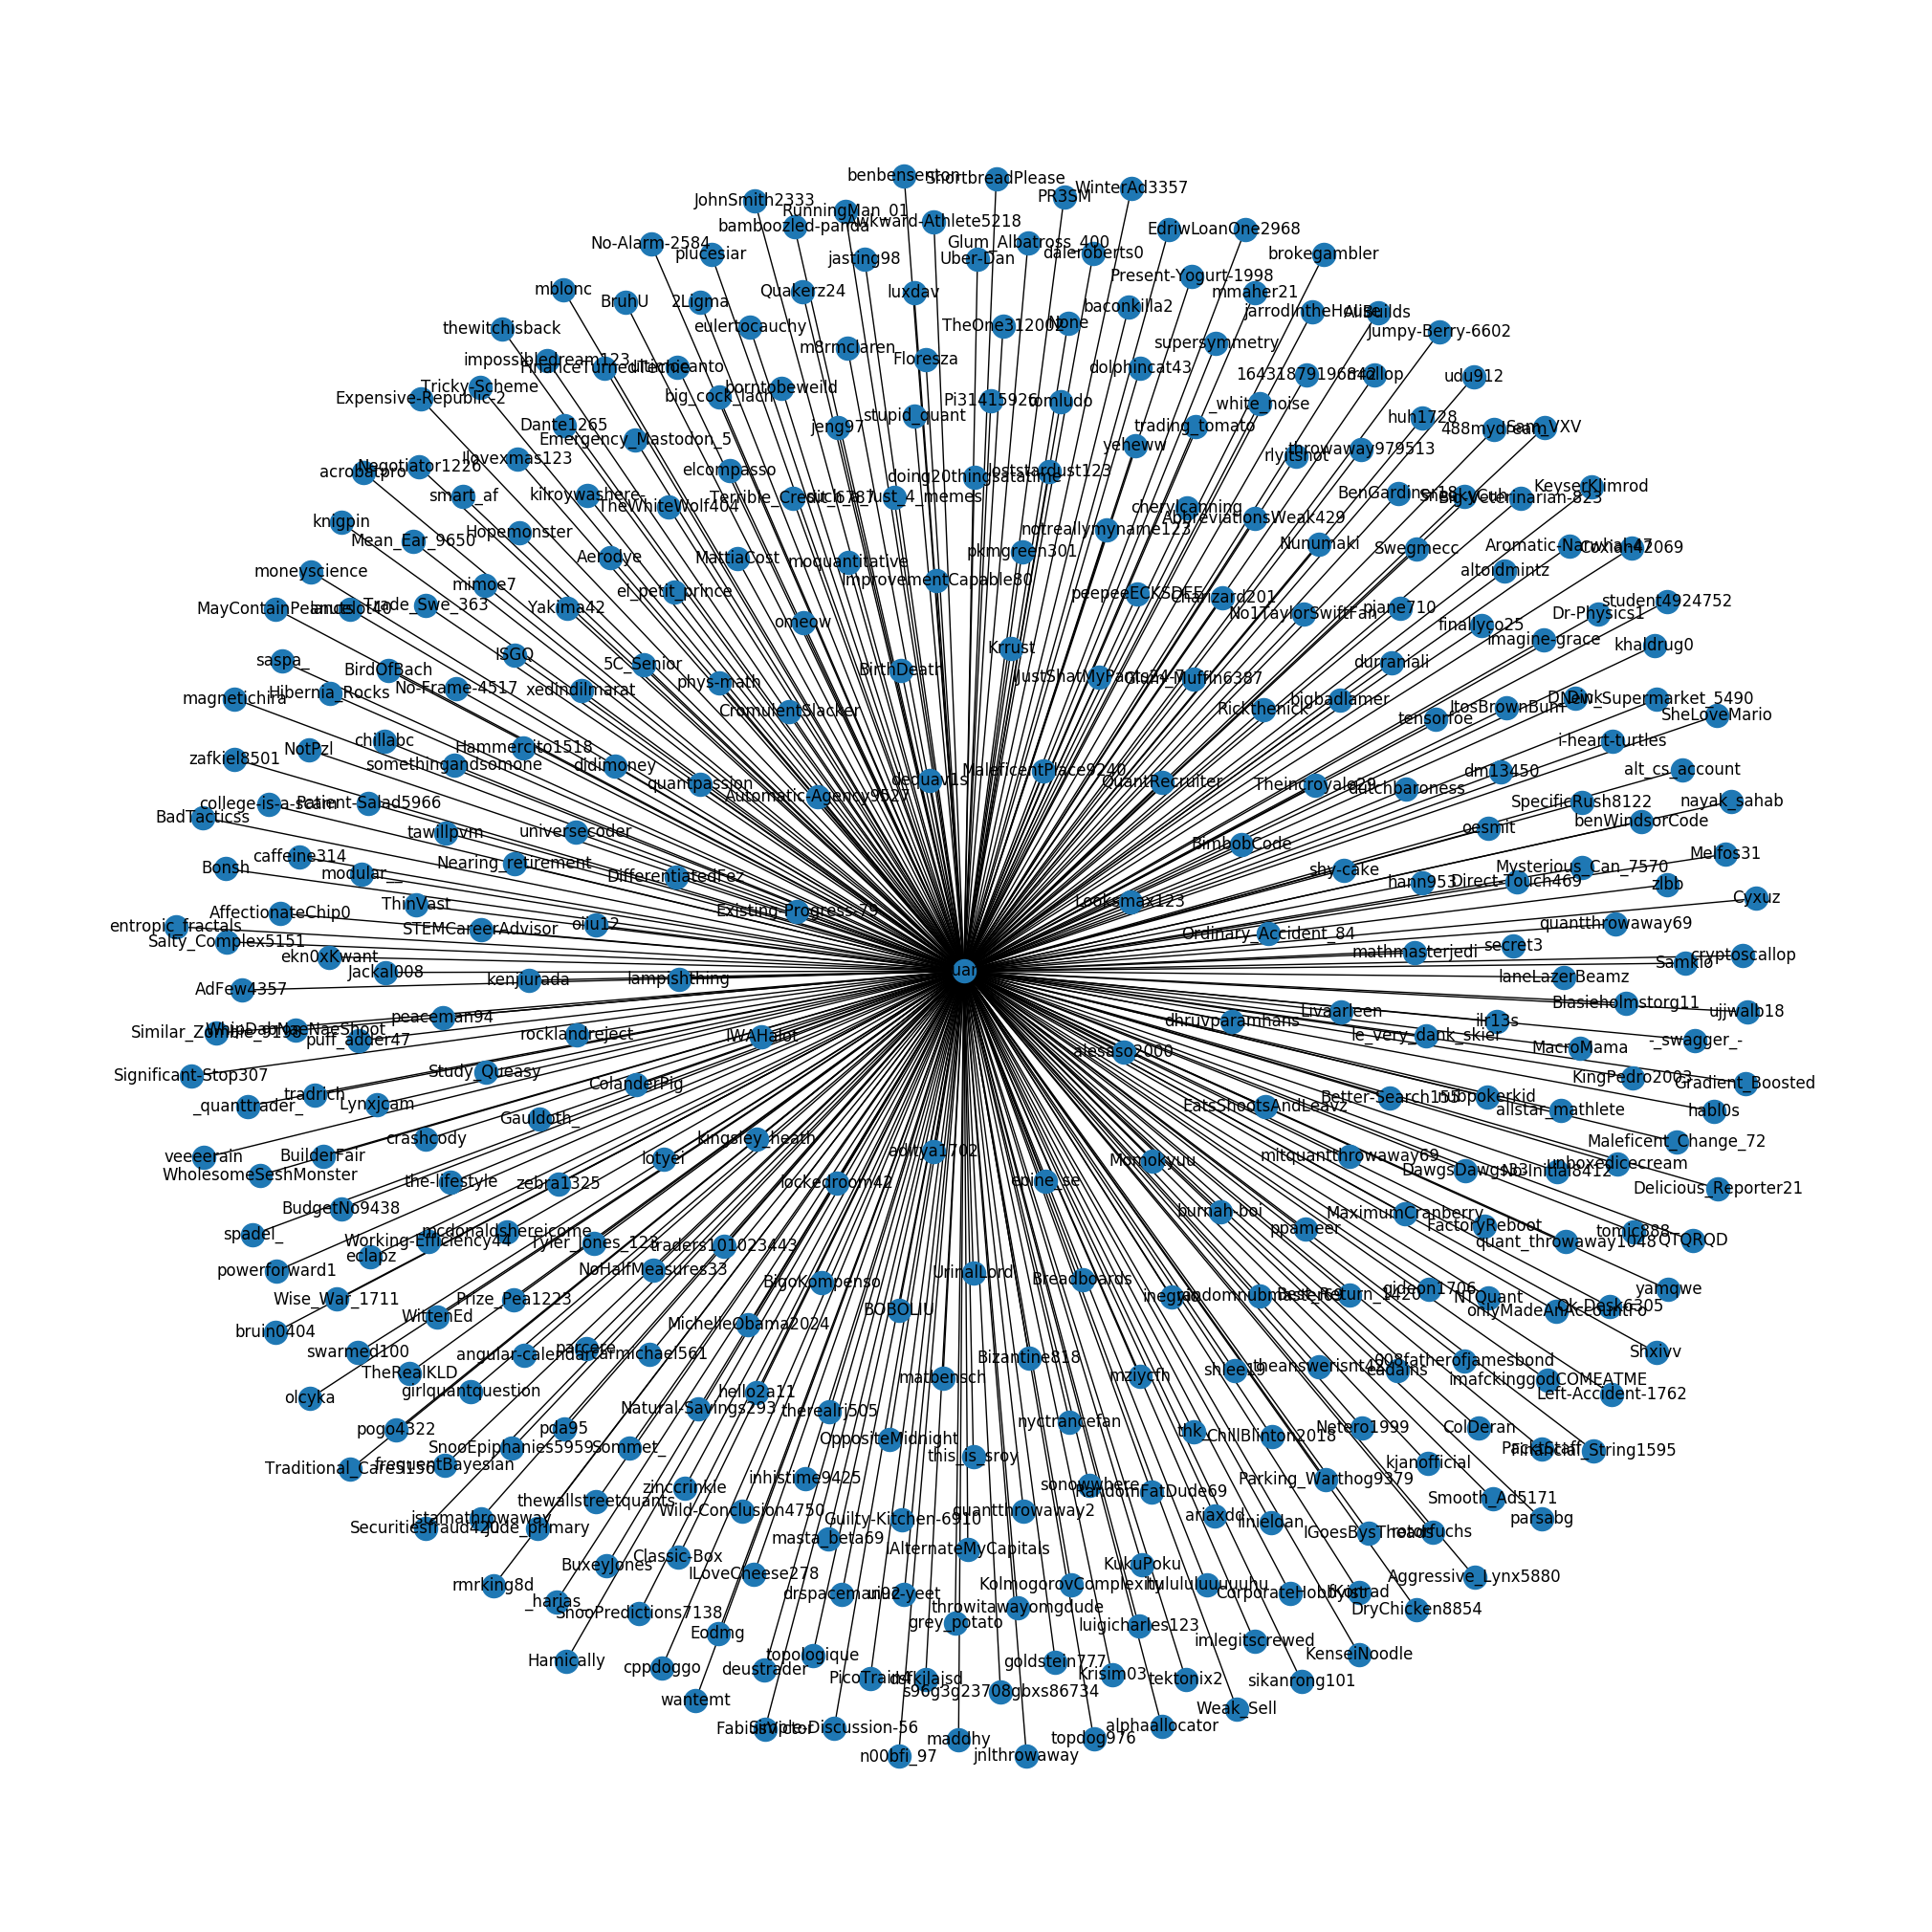

In [62]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
nx.draw(g, with_labels=True)

## Get comments using PRAW

In [2]:
import praw
import pandas as pd

# Replace the placeholders with your own credentials
client_id = client_id
client_secret = client_secret
username = 'rulerBitter'
# add your own
password = ''
user_agent = 'user'

# Initialize the PRAW Reddit instance
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     username=username,
                     password=password,
                     user_agent=user_agent)

def get_comments(submission):
    submission.comments.replace_more(limit=0)
    comments = []
    max_comments = len(submission.comments.list()) - 1
    for comment in submission.comments.list()[:max_comments]:
        comments.append({
            'author': str(comment.author),
            'body': comment.body,
            'score': comment.score,
            'created_utc': comment.created_utc
        })
    return comments

def get_posts(subred_name, n):
    subreddit = reddit.subreddit(subred_name)
    posts_info = [] 

    for subm in subreddit.top(limit=n):
        
        # Check if selftext is non-empty and the number of comments is greater than 2
        if subm.selftext and subm.num_comments > 2:
            subred_info = []
            subred_info.append(subm.id)  
            subred_info.append(str(subm.author)) 
            subred_info.append(subm.score)  
            subred_info.append(subm.upvote_ratio)
            subred_info.append(subm.num_comments)
            subred_info.append(subm.subreddit)
            subred_info.append(subm.selftext)

            # Get comments for the current submission
            comments = get_comments(subm)
            subred_info.append(comments)

            posts_info.append(subred_info)

    sorted_info = sorted(posts_info, key=lambda x: x[1], reverse=True)
    posts_df = pd.DataFrame(sorted_info, columns=['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit', 'selftext', 'comments'])
    return posts_df



# Example usage
subred_name = 'berkeley'
n = 5000

In [6]:
%%time 
df = get_posts(subred_name, 5000)

CPU times: user 5.83 s, sys: 359 ms, total: 6.19 s
Wall time: 3min 39s


In [11]:
df.apply(lambda x: len(x['comments']) == x['num_comments'], axis = 1)

0      False
1      False
2      False
3      False
4       True
       ...  
333    False
334    False
335    False
336    False
337     True
Length: 338, dtype: bool

In [12]:
df.to_csv('berkeley_top_337_new.csv')